# Image similarity search

## Summary

This project uses pretrained image classifier, but just using the output at the layer before the last (final output) layer (so called bottleneck) as an abstraction or representation of a image. Then use the representation to compare similiarity of the input images. By using the Euclidian distance between the representattion, it shows remarkable effectiveness in capturing the visual similarity of the images. 

### What are the benifits of the approach?

1. It might save much computations of the brutally compare the images among themselves. 
2. It might provide more robust/better similarity metrics with the abstracted representations. 

### Next Actions

1. Research other established image comparsion methods to appreciate the benifits of the apporach of using "bottleneck" representation. 
2. Perform comparision experiments to see if the performance of similarity is indeed more robust/better. 

First of all, I might want to do some literature research to know the existing works. 

Using the following keywords, I can many papers on Google "image similarity deep learning", for example, here is one that seems more accademic:
https://arxiv.org/ftp/arxiv/papers/1709/1709.08761.pdf (Image similarity using Deep CNN and Curriculum Learning )

For performance evaluation, I might want to print out the top 10 similiar images for each image to observe the pattern of similarities. 

### Motivations

I want to establish the usefulness of the reached internal representation by deep/convoluted neural networks to see if it has substantial semantic representations of the input image that can indeed help in the image understanding or associated reasoning. Image comparison is just one of such reasoning. 

In considering word embedding, and this image's "bottleneck" representation, they are all of some kind of "embedding" of the input image. I hope to establish that such well trained deep/convoluted neural networks over such rich data (image, sentence/paragraph, etc.), might indeed provide powerful embedding to facilitate reasoning with the rich data more effectively and efficiently. 

For example, paragraph similarity might be even more difficult to attain. I wish that if this embedding/bottleneck approach would serve well for paragraph similarity calculations, which is much harder to attain by brutal comparison of the words. 

## Experiment

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input

ImageDataGenerator:

Xception: a pre-train model

preprocess_input: the associated preprocessing for Xception!

In [4]:
batch_size=90
img_size = 299
train_path = './data/train/'

The data needs to be unzip'ed. 

### Image Data Generator

In [6]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
bottleneck_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    shuffle=False)

Found 90 images belonging to 3 classes.


bottleneck_generator is like a Python generator. It read image data from the directory, apply the preprocessing, reshape teh image, and provides data according to the batch_size. 

### Get one batch of images

In [7]:
images, labels  = bottleneck_generator.next()

In [8]:
images.shape

(90, 299, 299, 3)

### Load Xception base model

In [9]:
base_model = Xception(include_top=False, // not using the last layer (output)
                      weights='imagenet',
                      input_shape=(img_size, img_size, 3),
                      pooling='avg')

83689472/83683744 [==============================] - 41s 0us/step


### Transform Images to bottleneck features

In [10]:
bottlenecks = base_model.predict(images, verbose=1)

90/90 [==============================] - 34s 377ms/step


Transform the images into vectors using Xception's layer before the last (output) layer. 

In [11]:
bottlenecks.shape

(90, 2048)

### Distance Metric with Scikit Learn

In [12]:
from sklearn.neighbors import DistanceMetric

In [13]:
dist = DistanceMetric.get_metric('euclidean')

In [14]:
def imshow_scaled(img):
    plt.imshow((img + 1) / 2)

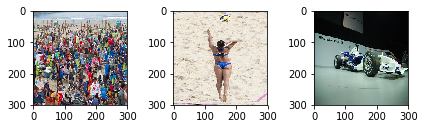

In [15]:
plt.subplot(1, 3, 1)
imshow_scaled(images[0])

plt.subplot(1, 3, 2)
imshow_scaled(images[1])

plt.subplot(1, 3, 3)
imshow_scaled(images[80])

plt.tight_layout()

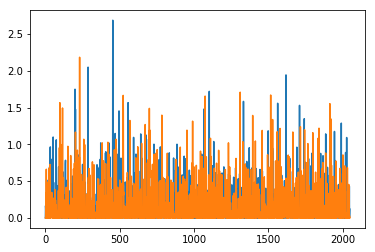

In [29]:
plt.plot(bottlenecks[0])
#plt.plot(bottlenecks[1])
plt.plot(bottlenecks[2])

### Pairwise distances

In [16]:
bn_dist = dist.pairwise(bottlenecks)

In [17]:
bn_dist.shape

(90, 90)

The following diagram shows that there are three clusters of images of similarity, according to the similarity distance of the "bottleneck" representation. The more similiar, the value of distance should be smaller (darker in gray scale). 

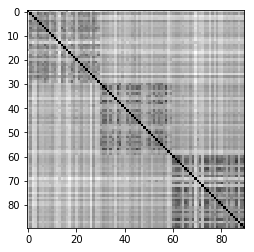

In [18]:
plt.imshow(bn_dist, cmap='gray')

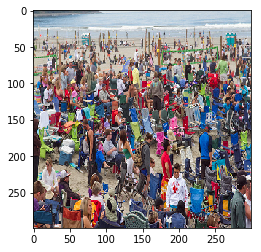

In [19]:
imshow_scaled(images[0])

In [37]:
n_rows = 3
n_cols = 3
n_images = n_rows * n_cols

In [46]:
seed = 37
dist_from_sel = pd.Series(bn_dist[seed])

In [47]:
dist_from_sel.sort_values().head(9)

37    0.000000
57    4.159285
31    4.424113
45    4.662022
32    4.801006
52    6.186609
34    6.241671
54    6.608557
46    6.680003
dtype: float64

In [48]:
retrieved = dist_from_sel.sort_values().head(n_images)

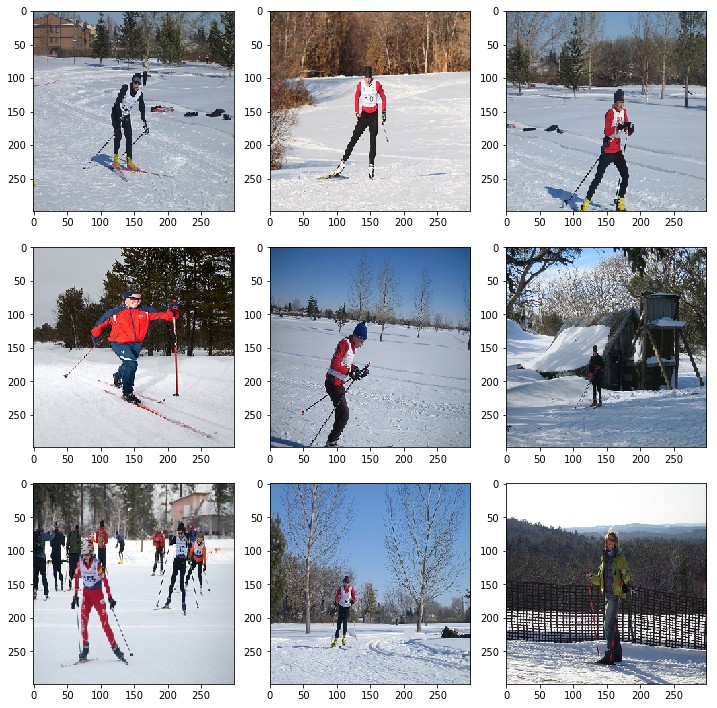

In [49]:
plt.figure(figsize=(10, 10))
i = 1
for idx in retrieved.index:
    plt.subplot(n_rows, n_cols, i)
    imshow_scaled(images[idx])
    i += 1
plt.tight_layout()

## Exercise

Define a function `image_search` that encapsulates the code above and retrieves and plot the top 8 images closest to a given image index:

```python
def image_search(img_index, n_rows=3, n_columns=3):
    ....your code here...
```